In [30]:
# Dependencies
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [31]:
# Read the data
data = pd.read_csv("data/cluster_predict.csv")
data

,zipcode,AVERAGE PRICE,Income per capita,Median Age Male,Median Age Female,Bachelor's degree > 25,Public transportation,clusters
0,602,114105.2500,9277.0,41.9,42.8,0.134690,0.002796,0
1,606,59377.7500,5943.0,43.2,43.4,0.068866,0.000000,0
2,610,108219.5833,10220.0,40.4,44.2,0.130349,0.002741,0
3,617,101022.0000,9122.0,39.2,41.0,0.157224,0.005154,0
4,693,330761.5000,10536.0,39.2,41.9,0.148064,0.006750,0
...,...,...,...,...,...,...,...,...
29423,99827,211487.0000,33387.0,45.2,45.8,0.229525,0.002308,0
29424,99833,254642.9167,33227.0,39.3,42.7,0.219672,0.009211,0
29425,99835,402391.3333,38423.0,37.2,40.5,0.204494,0.010178,0
29426,99901,294448.8333,34886.0,39.4,39.9,0.170142,0.035648,0


In [32]:
# Get only cluster 4 - defined tech hub
tech_cluster = data.drop(data[data.clusters.isin(["0", "1","2","3"])].index)
tech_cluster

,zipcode,AVERAGE PRICE,Income per capita,Median Age Male,Median Age Female,Bachelor's degree > 25,Public transportation,clusters
145,1451,634110.1667,68615.0,46.5,46.1,0.362543,0.070785,4
216,1720,588626.6667,62794.0,43.1,45.2,0.306525,0.068392,4
218,1730,717994.1667,61653.0,43.2,42.2,0.311890,0.023079,4
219,1740,544468.6667,56557.0,41.1,45.3,0.356956,0.034991,4
220,1741,827411.5833,85227.0,47.8,48.7,0.363234,0.029996,4
...,...,...,...,...,...,...,...,...
28984,98332,535136.7500,54015.0,47.2,45.3,0.260272,0.017609,4
28985,98333,615631.7500,50347.0,48.6,47.9,0.304682,0.014141,4
28986,98335,518323.5833,47921.0,44.2,47.2,0.240744,0.014269,4
29000,98358,509187.1667,34195.0,63.7,59.5,0.408847,0.065147,4


In [34]:
# Export
tech_cluster.to_csv('data/techhub_cluster.csv')

In [35]:
# Get only clusters 0,1,2,3
nontech_cluster = data.drop(data[data.clusters.isin(["4"])].index)
nontech_cluster

,zipcode,AVERAGE PRICE,Income per capita,Median Age Male,Median Age Female,Bachelor's degree > 25,Public transportation,clusters
0,602,114105.2500,9277.0,41.9,42.8,0.134690,0.002796,0
1,606,59377.7500,5943.0,43.2,43.4,0.068866,0.000000,0
2,610,108219.5833,10220.0,40.4,44.2,0.130349,0.002741,0
3,617,101022.0000,9122.0,39.2,41.0,0.157224,0.005154,0
4,693,330761.5000,10536.0,39.2,41.9,0.148064,0.006750,0
...,...,...,...,...,...,...,...,...
29423,99827,211487.0000,33387.0,45.2,45.8,0.229525,0.002308,0
29424,99833,254642.9167,33227.0,39.3,42.7,0.219672,0.009211,0
29425,99835,402391.3333,38423.0,37.2,40.5,0.204494,0.010178,0
29426,99901,294448.8333,34886.0,39.4,39.9,0.170142,0.035648,0


In [36]:
# Export
nontech_cluster.to_csv('data/nontechhub_cluster.csv')

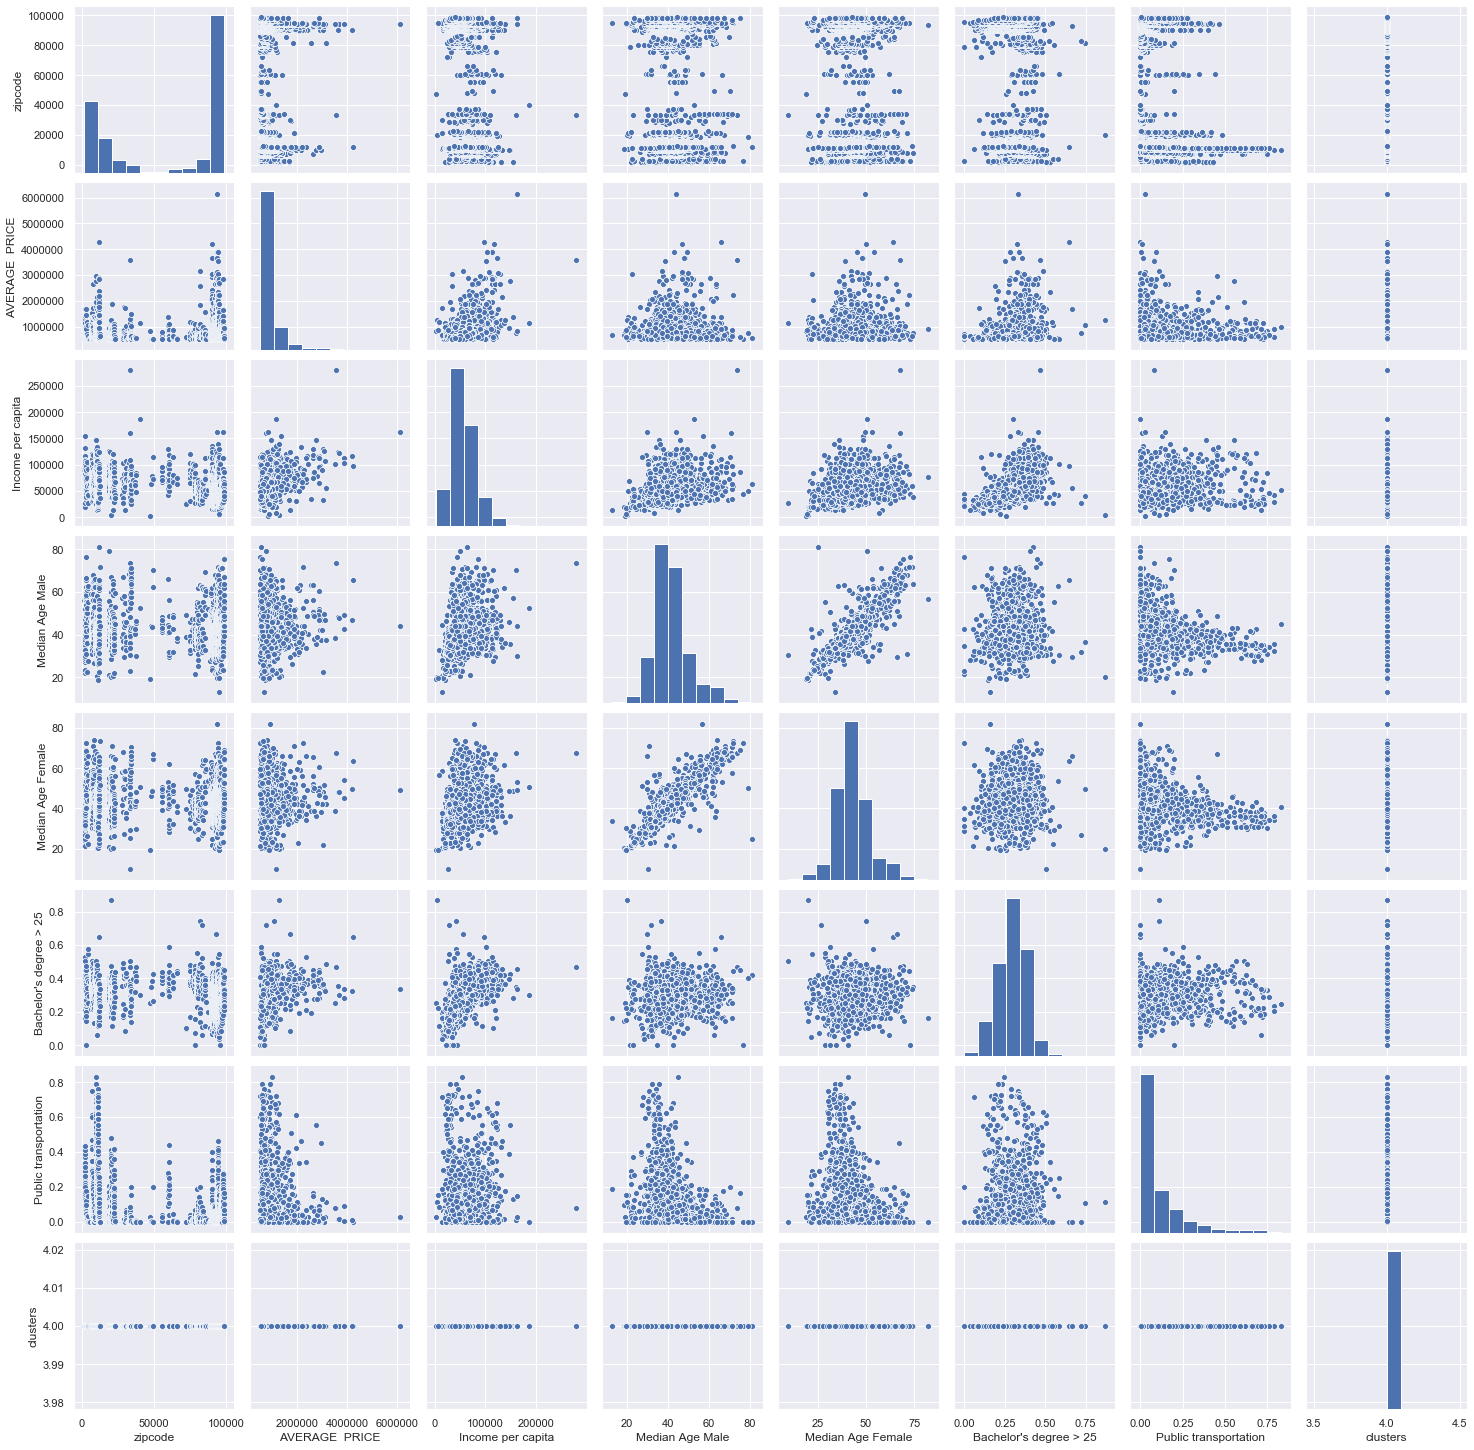

In [37]:
# Misc plot view
sns.pairplot(tech_cluster)

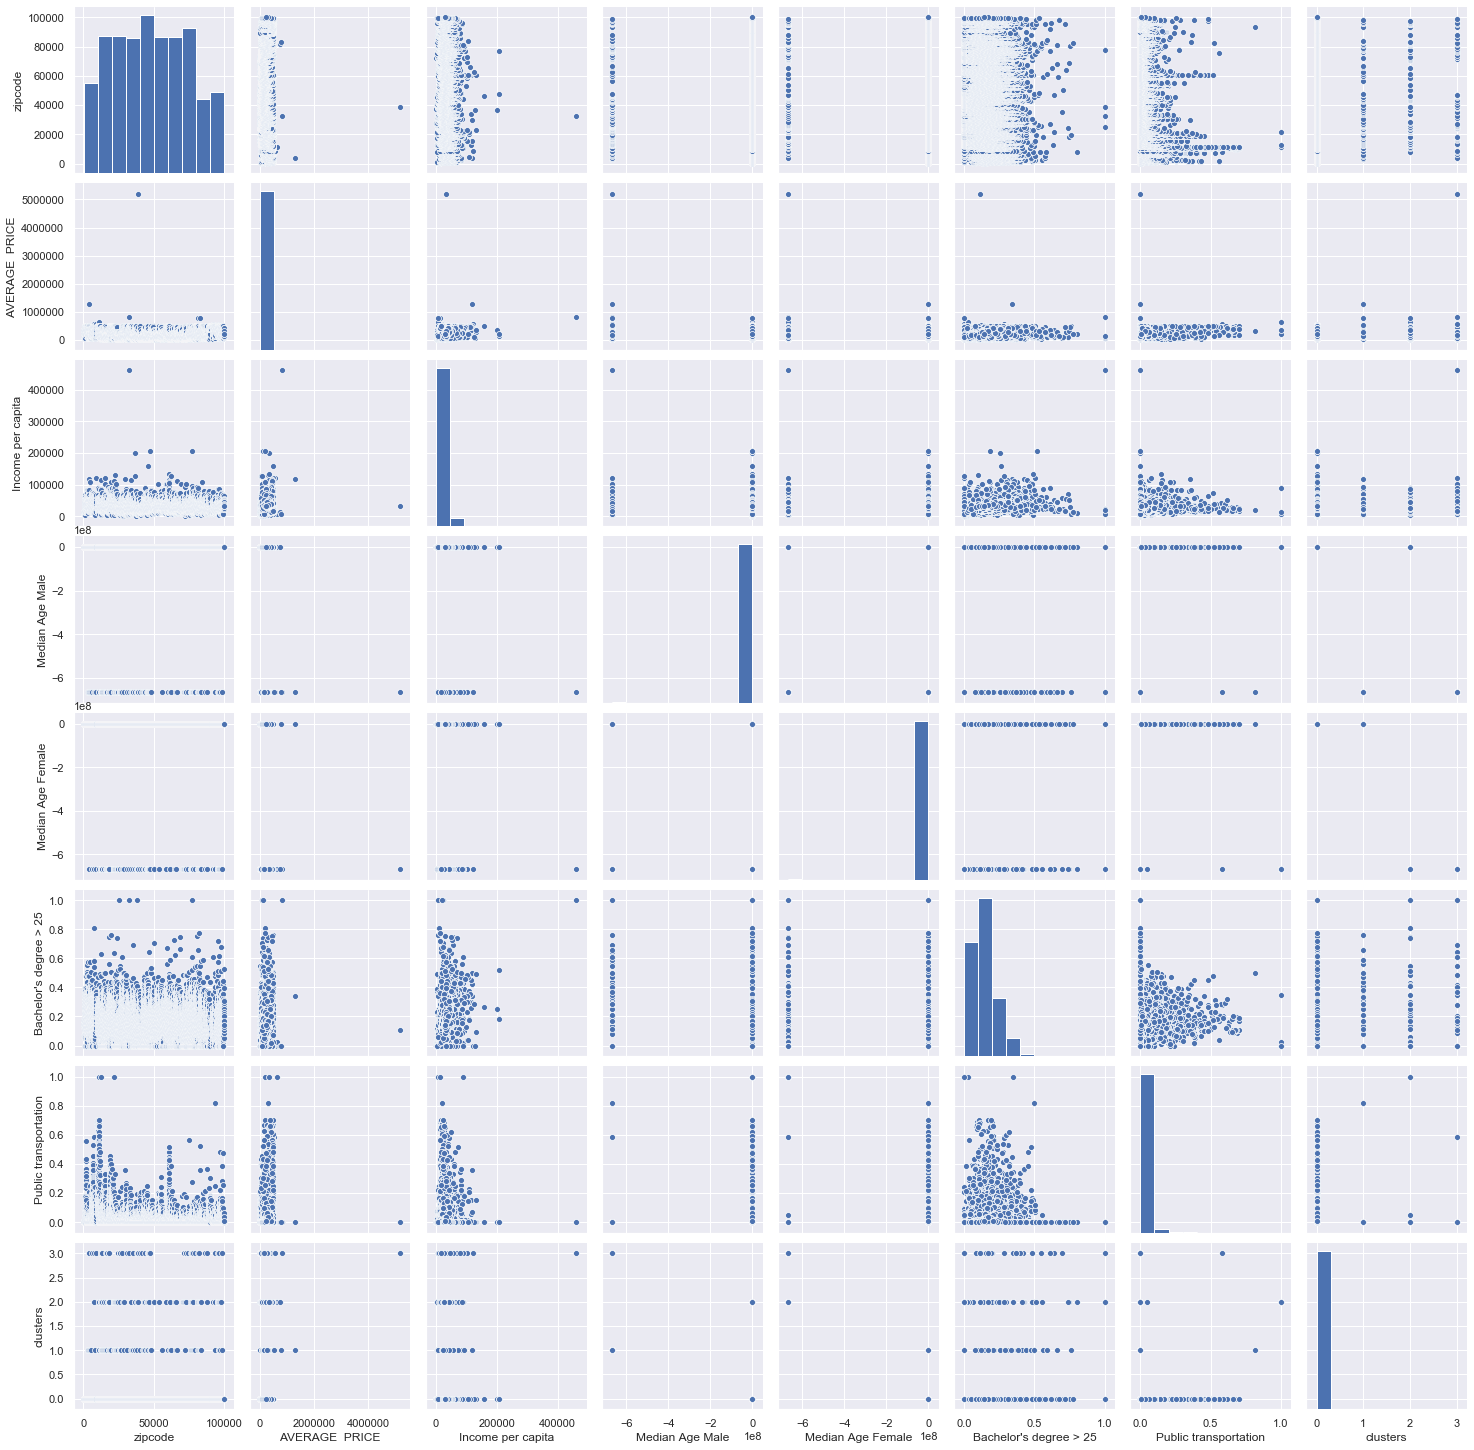

In [38]:
# Misc plot view
sns.pairplot(nontech_cluster)

In [9]:
# Define variables we based predictions on
x = data[['Income per capita', 'Median Age Male', 'Median Age Female',

       "Bachelor's degree > 25", 'Public transportation']]

In [22]:
# Define prediction variable - wat we are trying to predict
y = data['clusters']

In [23]:
# Split test and training data sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state=1)

In [24]:
# Build model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
# Fit model using training data
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
# Validate the model using the test data
print(f"Training Data Score: {classifier.score(x_train, y_train)}")
print(f"Testing Data Score: {classifier.score(x_test, y_test)}")

Training Data Score: 0.9500946647895528
Testing Data Score: 0.9472193906444671


In [27]:
predictions = classifier.predict(x_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
11779,0,0
2774,0,0
2182,4,4
8846,0,0
28642,0,0
...,...,...
3197,0,0
6950,0,0
18049,0,0
14677,0,0
